### Advance Statistics Project Jupyter File

### Submitted by: Deepti Agrawal

# Problem 1A

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

In [2]:
## Importing the packages
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the CSV file into pandas dataframe
Sal = pd.read_csv('SalaryData.csv')

In [3]:
#checking the head(top 5 rows) of the data frame
Sal.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [4]:
## Checking the number of rows and columns
Sal.shape

(40, 3)

The data set contains 40 observations of data and 3 variables.

In [5]:
#checking the data types /information
Sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


 The data has 40 instances with 3 attributes. 1 integer type and 2 object type(Strings in the column) 

In [6]:
#checking for missing values
Sal.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

There are no missing values in the dataset

In [7]:
## Summary of dataframe (also called as 5 Point summary)
Sal.describe(include='all').T

count unique              top freq    mean      std    min  \
Education     40      3        Doctorate   16     NaN      NaN    NaN   
Occupation    40      4   Prof-specialty   13     NaN      NaN    NaN   
Salary        40    NaN              NaN  NaN  162187  64860.4  50103   

                25%     50%     75%     max  
Education       NaN     NaN     NaN     NaN  
Occupation      NaN     NaN     NaN     NaN  
Salary      99897.5  169100  214441  260151

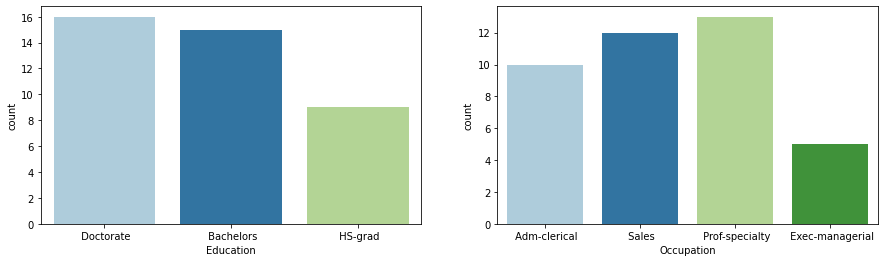

In [8]:
#Plotting Count Plots to see how different education levals and occupations have been distributed.

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x =Sal['Education'],palette= 'Paired')

plt.subplot(1,2,2)
sns.countplot(x =Sal['Occupation'], palette= 'Paired')

plt.show()

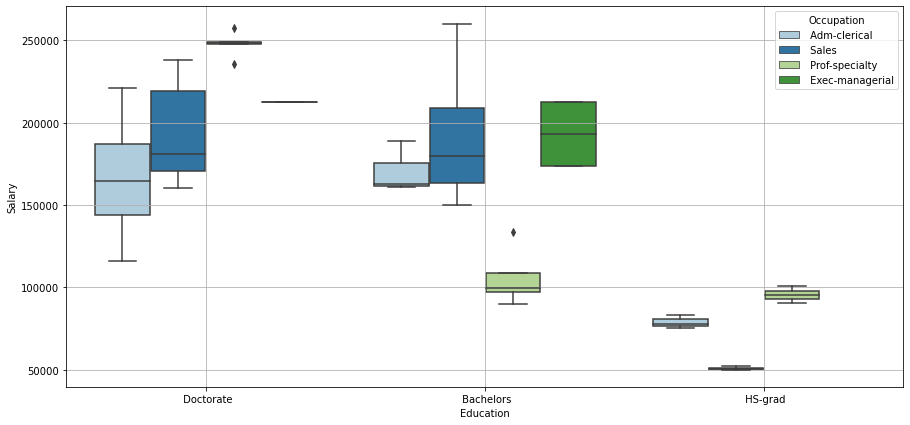

In [9]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Education", y="Salary", data=Sal,hue='Occupation', palette= 'Paired')
plt.grid()
plt.show()

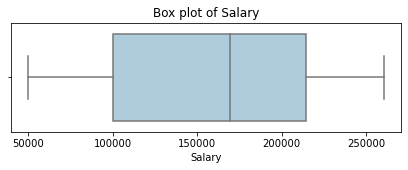

In [10]:
## Checking for Outliers4

plt.figure(figsize= (7,2))
sns.boxplot(x= 'Salary',data =Sal ,palette= 'Paired', orient = 'h').set(title ="Box plot of Salary");



In [11]:
#Lets create a crosstab of Education and Occupation of the individuals.
pd.crosstab(Sal['Education'], Sal['Occupation'], margins=True)


Occupation   Adm-clerical   Exec-managerial   Prof-specialty   Sales  All
Education                                                                
 Bachelors              3                 4                4       4   15
 Doctorate              4                 1                6       5   16
 HS-grad                3                 0                3       3    9
All                    10                 5               13      12   40

#### As given, we are assuming that the data follows normal distribution. Therefore, we can apply ANOVA on the data.

### Q1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

- Formulating the Null and Alternate Hypothesis for conducting One-Way Anova on Salary with respect to Education Levels

**Null Hypothesis $H_0$  :** The mean Salary for different individuals is same with different Education Levels

**Alternate Hypothesis $H_A$ :** The mean Salary for different individuals is different in at-least one Education Level


- Formulating the Null and Alternate Hypothesis for conducting One-Way Anova on Salary for different Occupations

**Null Hypothesis $H_0$  :** The mean Salary for different individuals is same with different Occupations

**Alternate Hypothesis $H_A$ :** The mean Salary for different individuals is different in at-least one Occupation



### Q2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

**Null Hypothesis $H_0$  :** The mean Salary for different individuals is same with different Education Levels

**Alternate Hypothesis $H_A$ :** The mean Salary for different individuals is different in at-least one Education Level


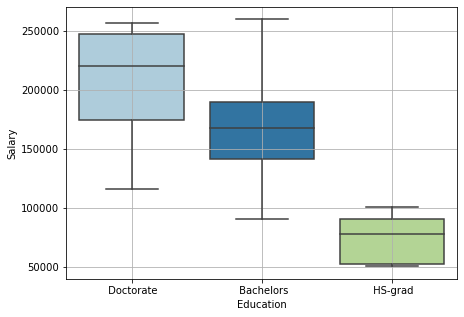

In [48]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Education", y="Salary", data=Sal, palette= 'Paired')
plt.grid()
plt.show()

In [19]:
#Performing One-Way ANOVA with respect to education
formula = 'Salary ~ C(Education)'
model = ols(formula, Sal).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


${SST = SSB + SSW}$

In [22]:
SSW=aov_table['sum_sq'][0]
SSB=aov_table['sum_sq'][1]
SST= SSW+SSB
print('Sum of Squared Total',SST)

Sum of Squared Total 108215412789.24692


**Conclusion:** Since the p value is less than the significance level (0.05), **we can reject the null hypothesis** and conclude that there is a difference in the mean Salaries for individuals with different education levels

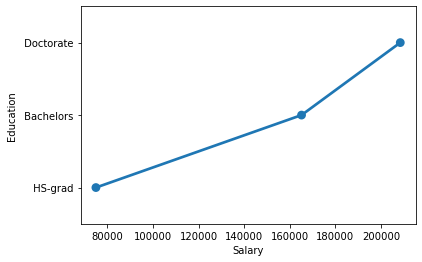

In [12]:
sns.pointplot(x ='Salary', y='Education', data =Sal, ci=None);

### Q3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

**Null Hypothesis $H_0$  :** The mean Salary for different individuals is same with different Occupations

**Alternate Hypothesis $H_A$ :** The mean Salary for different individuals is different in at-least one Occupation


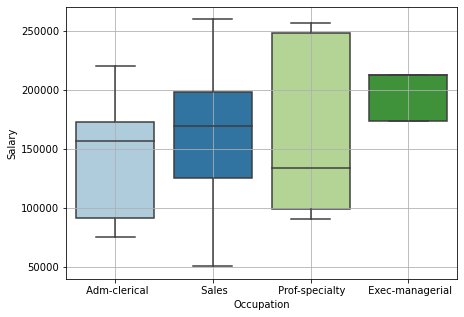

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Occupation", y="Salary", data=Sal, palette= 'Paired')
plt.grid()
plt.show()

In [25]:
#Performing One-Way ANOVA with respect to occupation
formula = 'Salary ~ C(Occupation)'
model = ols(formula, Sal).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


${SST = SSB + SSW}$

In [26]:
SSW=aov_table['sum_sq'][0]
SSB=aov_table['sum_sq'][1]
SST= SSW+SSB
print('Sum of Squared Total',SST)

Sum of Squared Total 164068026010.375


**Conclusion:** Since the p value is greater than the significance level (0.05), we can say that **we fail to reject the Null Hypothesis** and conclude that the mean Salary for different individuals is same with different Occupations.

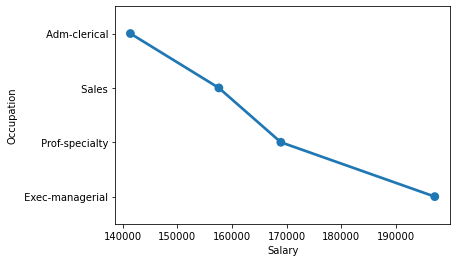

In [15]:
sns.pointplot(x ='Salary', y='Occupation', data =Sal, ci=None);

### Q4. If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result.

We have rejected the null hypothesis while performing ANOVA on Salary with respect to Education variable.
Therefore, performing Tukey Honest Test to check the difference between different education levels.

#### Tukey Honest Significant Difference

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [17]:
compare = MultiComparison(Sal['Salary'], Sal['Education'])
result = compare.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


**Conclusion:** It shows that there is a significant difference in the mean salaries of all educationl levels.

# Problem 1B

### Q1. What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

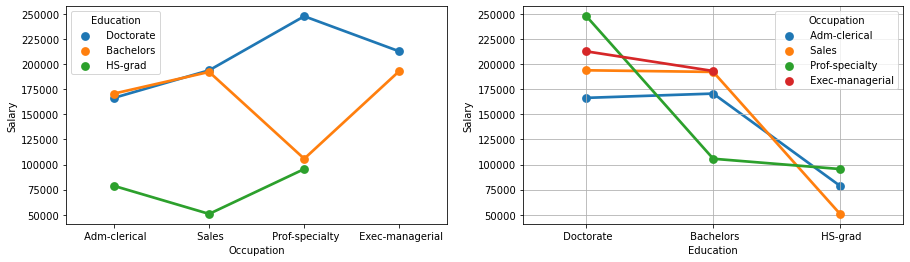

In [18]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.pointplot(x = 'Occupation', y = 'Salary', hue='Education',pallete='Paired',data=Sal,ci=None)

plt.subplot(1,2,2)
sns.pointplot(x = 'Education', y = 'Salary', hue='Occupation',pallete='Paired',data=Sal,ci=None)

plt.grid()
plt.show()

### Q2. Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

**Null Hypothesis $H_0$  :** The mean Salary with respect to each Occupation and Education category is equal.

**Alternate Hypothesis $H_A$ :** At least one of the means of Salary with respect to each Occupation and Education category is unequal.


In [19]:
#Two-Way ANOVA
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, Sal).fit()
aov_table = anova_lm(model, type=2)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


In [20]:
#Interaction Effect of Education on Occupation
formula = 'Salary~C(Education)+C(Occupation)+C(Education):C(Occupation)'
model=ols(formula, Sal).fit()
aov_table=anova_lm(model,type=2)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


As education and occupation interaction is less than 0.05 , there seems to be some statistical interaction between the two

**Conclusion**
- As Education and Occupation interaction is less than 0.05 , there seems to be some statistical interaction between the two.
- Considering both the factors(education and occupation), education is a significant factor as the p value is <0.05 wheras occupation is not a significant variable as p value of occupation is >0.05

### Q3. Explain the business implications of performing ANOVA for this particular case study.

**Business Implications**
- Education is a big factor in deterimining the Salary of an individual.
- Salary of an individual doesnot depend on the occupation alone. But, considering both education level and occupation combinedly has a good effect on the salary of the individual.

# Problem 2

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [3]:
# reading the CSV file into pandas dataframe
Edu = pd.read_csv('Education+Post+12th+Standard.csv')

### Q1. Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

**Exploratory Data Univariate Analysis**

In [4]:
#checking the head(top 5 rows) of the data frame
Edu.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [5]:
#checking the tail(last 5 rows) of the data frame
Edu.tail()

Names   Apps  Accept  Enroll  Top10perc  \
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99

In [6]:
# Checking the number of rows and columns
print("no. of rows: ",Edu.shape[0], "\n""no. of columns: ",Edu.shape[1])

no. of rows:  777 
no. of columns:  18


In [7]:
#List of fields along with their data types
Edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [8]:
# Summary of dataset(also called as 5 Point summary)
Edu.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [9]:
# Are there any duplicates?
dups = Edu.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
Edu[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

In [10]:
Edu.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

##### Observation:

Data has been loaded correctly into the pandas dataframe 

There are 777 rows and 18 features

There are no missing values in the dataset.

There are no duplicate rows.

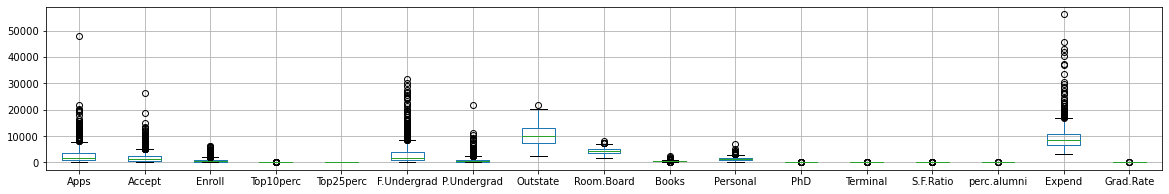

In [11]:
Edu.boxplot(figsize=(20,3))

In [12]:
# Checking for missing values
Edu.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

**Univariate Analysis**

Plotting the frequency plots and boxplots for numercial variables

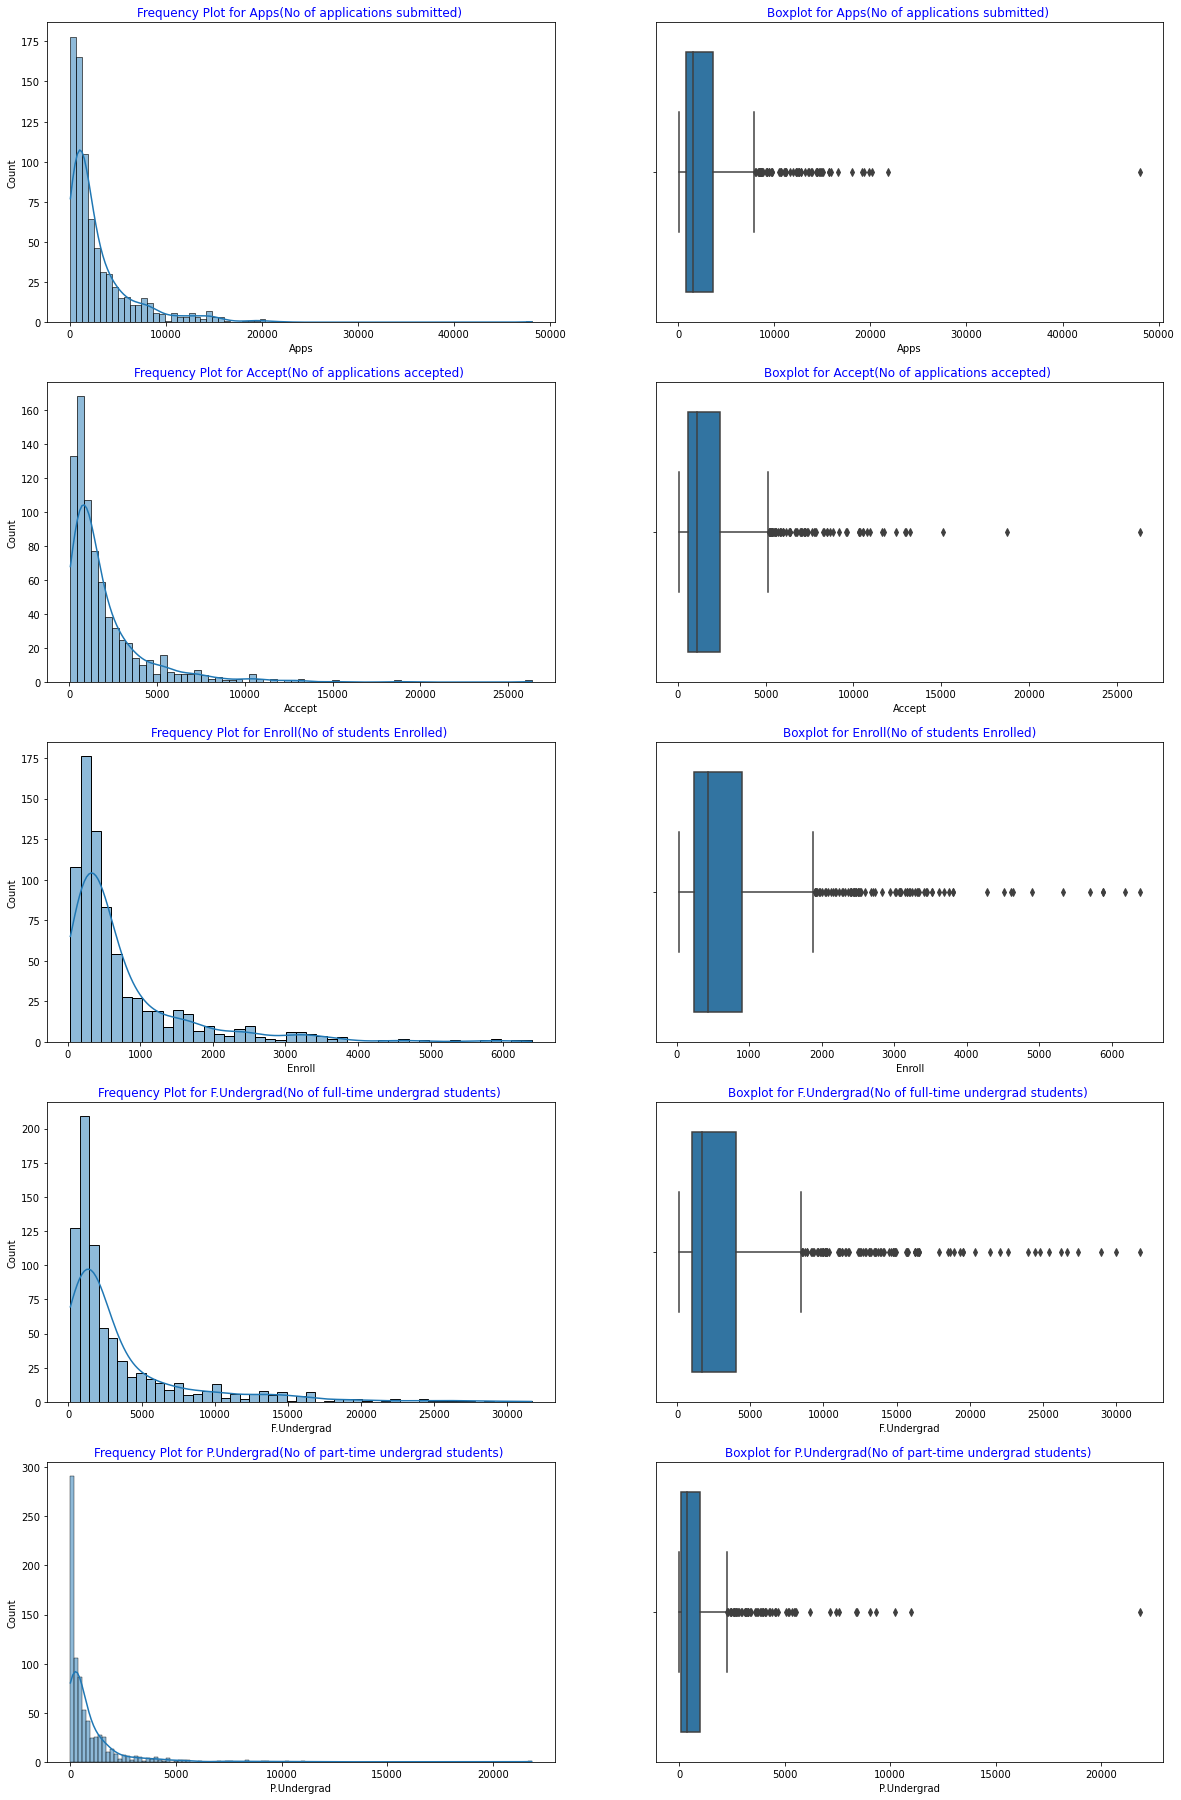

In [13]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,32)

ax=sns.histplot(Edu['Apps'], kde=True, ax=axes[0][0])
ax.set_title("Frequency Plot for Apps(No of applications submitted) ", fontsize =12, color ='Blue')
ay=sns.boxplot(x='Apps', data=Edu, ax=axes[0][1])
ay.set_title("Boxplot for Apps(No of applications submitted) ", fontsize =12, color ='Blue')

bx=sns.histplot(Edu['Accept'] , kde=True, ax=axes[1][0])
bx.set_title("Frequency Plot for Accept(No of applications accepted) ", fontsize =12, color ='Blue')
by=sns.boxplot(x='Accept', data=Edu , ax=axes[1][1])
by.set_title("Boxplot for Accept(No of applications accepted) ", fontsize =12, color ='Blue')

cx=sns.histplot(Edu['Enroll'] , kde=True, ax=axes[2][0])
cx.set_title("Frequency Plot for Enroll(No of students Enrolled) ", fontsize =12, color ='Blue')
cy=sns.boxplot(x='Enroll', data=Edu , ax=axes[2][1])
cy.set_title("Boxplot for Enroll(No of students Enrolled)", fontsize =12, color ='Blue')

dx=sns.histplot(Edu['F.Undergrad'] , kde=True, ax=axes[3][0])
dx.set_title("Frequency Plot for F.Undergrad(No of full-time undergrad students) ", fontsize =12, color ='Blue')
dy=sns.boxplot(x='F.Undergrad', data=Edu , ax=axes[3][1])
dy.set_title("Boxplot for F.Undergrad(No of full-time undergrad students) ", fontsize =12, color ='Blue')

ex=sns.histplot(Edu['P.Undergrad'] , kde=True, ax=axes[4][0])
ex.set_title("Frequency Plot for P.Undergrad(No of part-time undergrad students) ", fontsize =12, color ='Blue')
ey=sns.boxplot(x='P.Undergrad', data=Edu , ax=axes[4][1])
ey.set_title("Boxplot for P.Undergrad(No of part-time undergrad students) ", fontsize =12, color ='Blue')


plt.show()

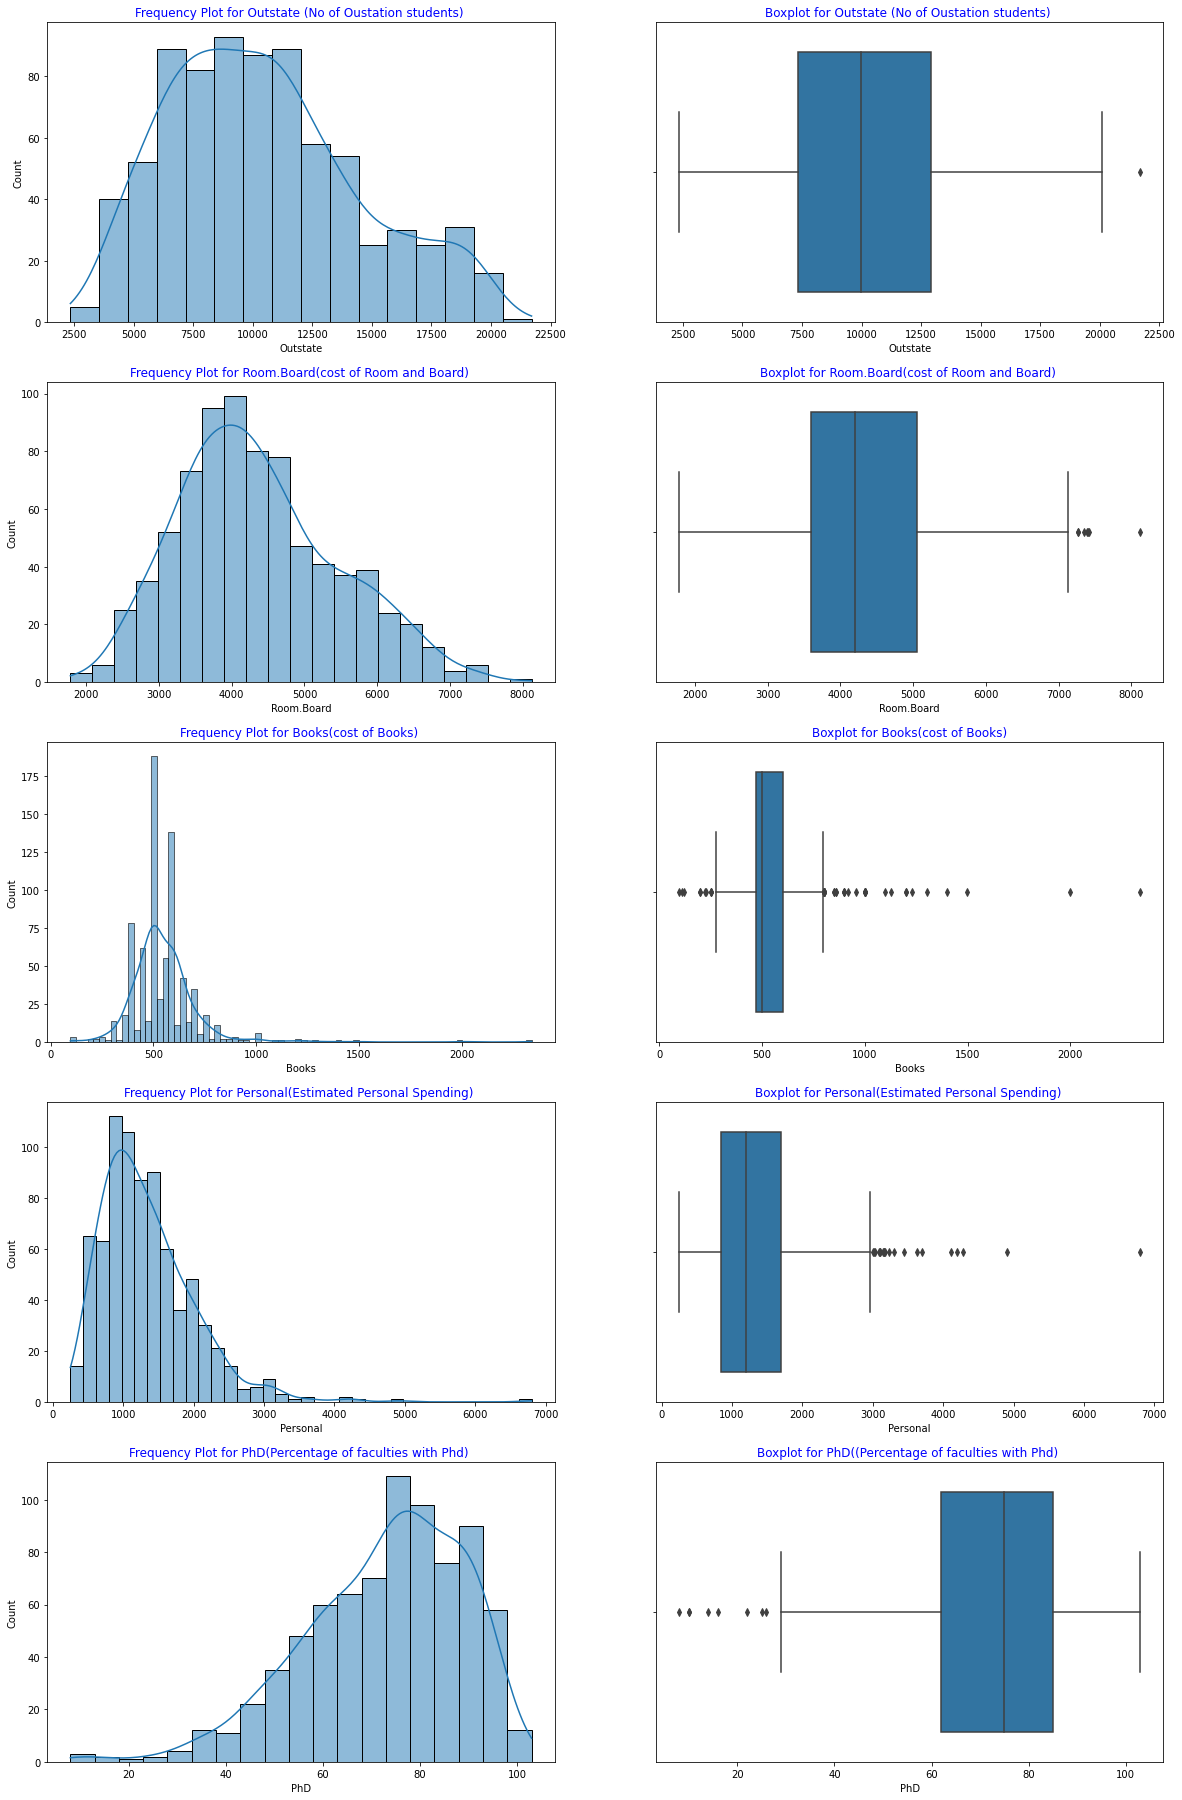

In [14]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,32)

ax=sns.histplot(Edu['Outstate'], kde=True, ax=axes[0][0])
ax.set_title("Frequency Plot for Outstate (No of Oustation students) ", fontsize =12, color ='Blue')
ay=sns.boxplot(x='Outstate', data=Edu, ax=axes[0][1])
ay.set_title("Boxplot for Outstate (No of Oustation students) ", fontsize =12, color ='Blue')

bx=sns.histplot(Edu['Room.Board'] , kde=True, ax=axes[1][0])
bx.set_title("Frequency Plot for Room.Board(cost of Room and Board) ", fontsize =12, color ='Blue')
by=sns.boxplot(x='Room.Board', data=Edu , ax=axes[1][1])
by.set_title("Boxplot for Room.Board(cost of Room and Board) ", fontsize =12, color ='Blue')

cx=sns.histplot(Edu['Books'] , kde=True, ax=axes[2][0])
cx.set_title("Frequency Plot for Books(cost of Books) ", fontsize =12, color ='Blue')
cy=sns.boxplot(x='Books', data=Edu , ax=axes[2][1])
cy.set_title("Boxplot for Books(cost of Books)", fontsize =12, color ='Blue')

dx=sns.histplot(Edu['Personal'] , kde=True, ax=axes[3][0])
dx.set_title("Frequency Plot for Personal(Estimated Personal Spending) ", fontsize =12, color ='Blue')
dy=sns.boxplot(x='Personal', data=Edu , ax=axes[3][1])
dy.set_title("Boxplot for Personal(Estimated Personal Spending) ", fontsize =12, color ='Blue')

ex=sns.histplot(Edu['PhD'] , kde=True, ax=axes[4][0])
ex.set_title("Frequency Plot for PhD(Percentage of faculties with Phd) ", fontsize =12, color ='Blue')
ey=sns.boxplot(x='PhD', data=Edu , ax=axes[4][1])
ey.set_title("Boxplot for PhD((Percentage of faculties with Phd) ", fontsize =12, color ='Blue')


plt.show()

**Bivariate Analysis**

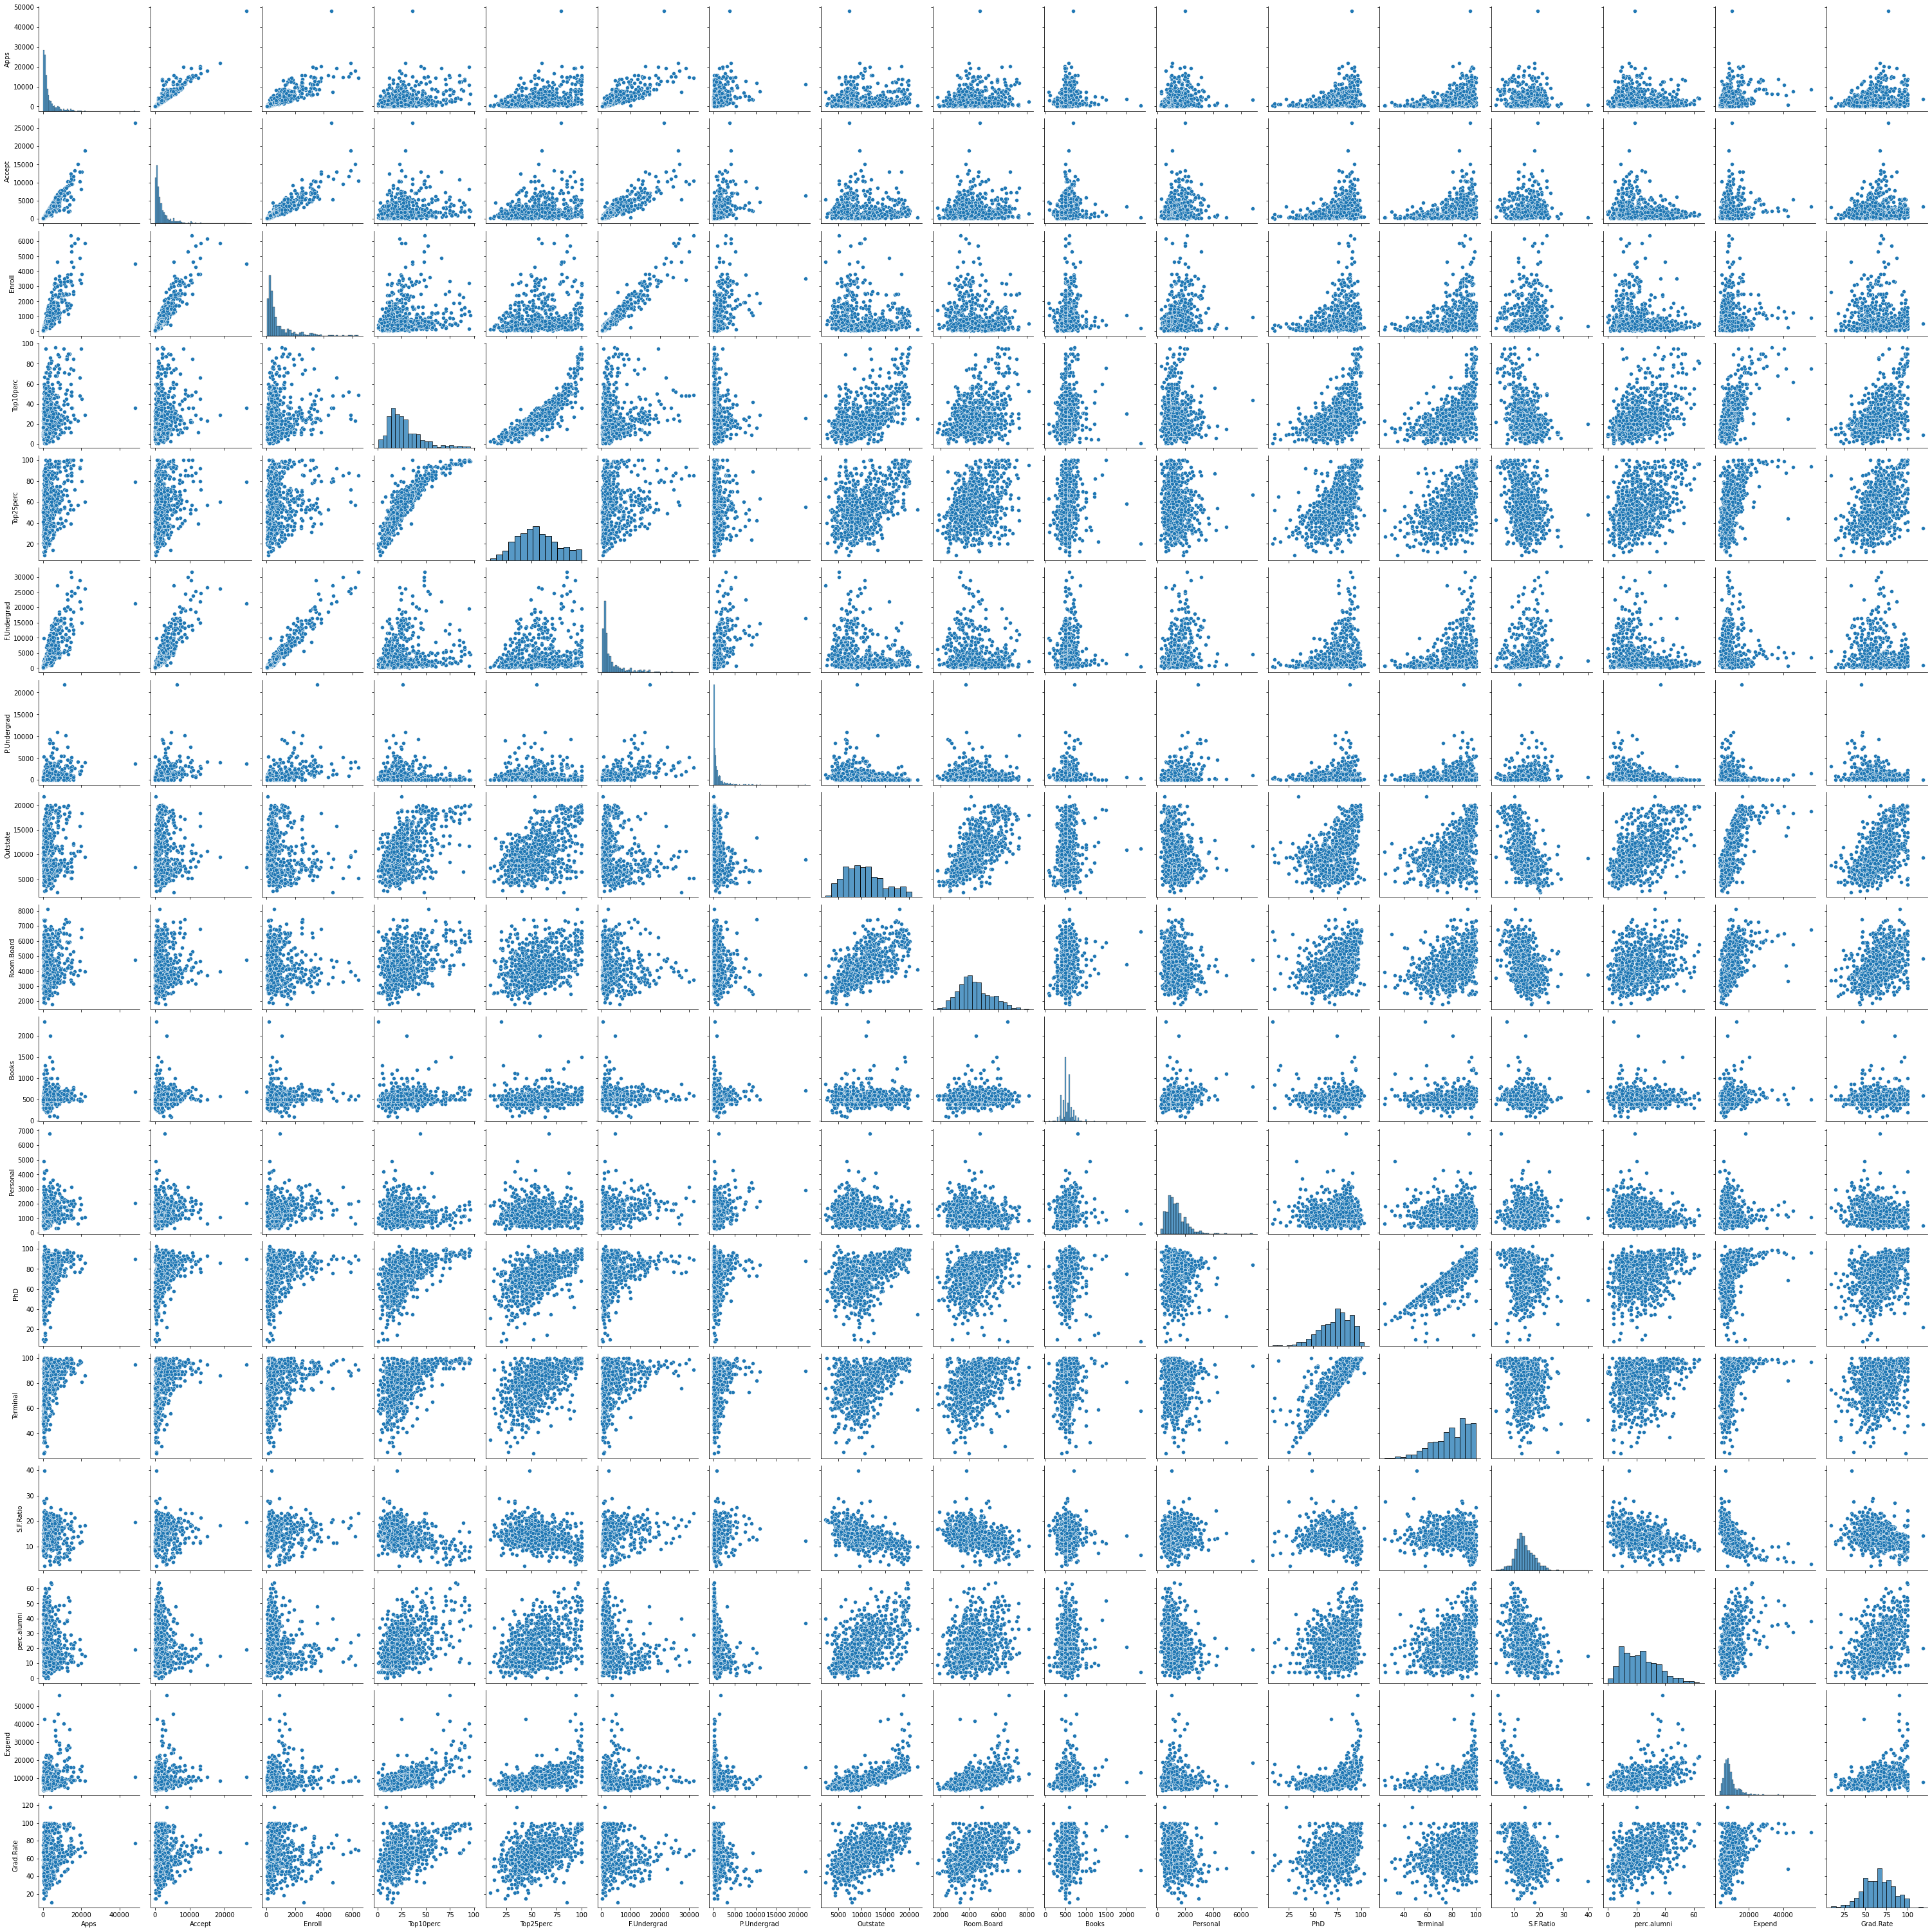

In [21]:
sns.pairplot(Edu)

In [16]:
Edu.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

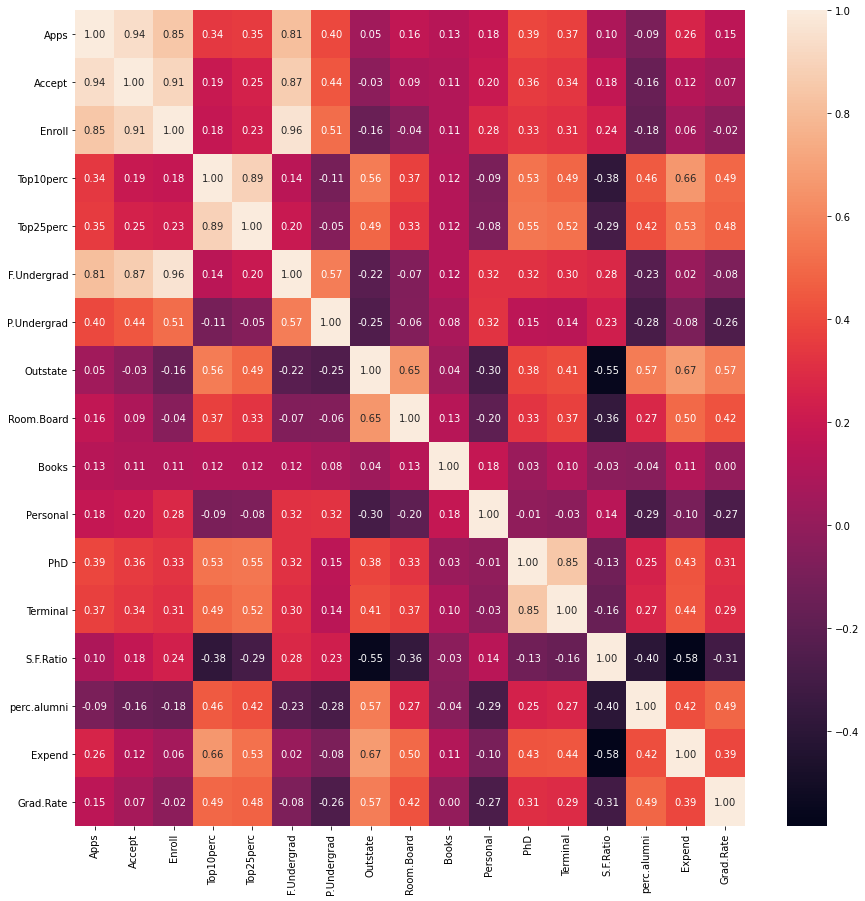

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(Edu.corr(),annot=True,fmt=".2f");

### Q2. Is scaling necessary for PCA in this case? Give justification and perform scaling.

In this method, we convert variables with different scales of measurements into a single scale.

StandardScaler normalizes the data using the formula (x-mean)/standard deviation.

We will be doing this only for the numerical variables.

In [24]:
# Drop id and class variables
data_new = Edu.drop(['Names'], axis =1)

data_new.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [25]:
#Scales the data by using z score
from scipy.stats import zscore
data_new=data_new.apply(zscore)
data_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

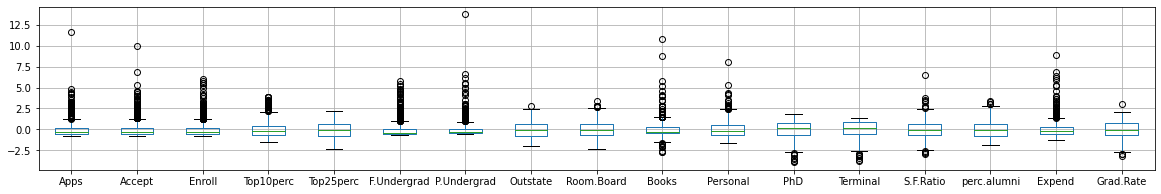

In [26]:
data_new.boxplot(figsize=(20,3))

### Q3. Comment on the comparison between the covariance and the correlation matrices from this data.

In [27]:
#Create covariance matrix

cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [28]:
# Create correlation matrix
data_new.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

### Q4. Check the dataset for outliers before and after scaling. What insight do you derive here?

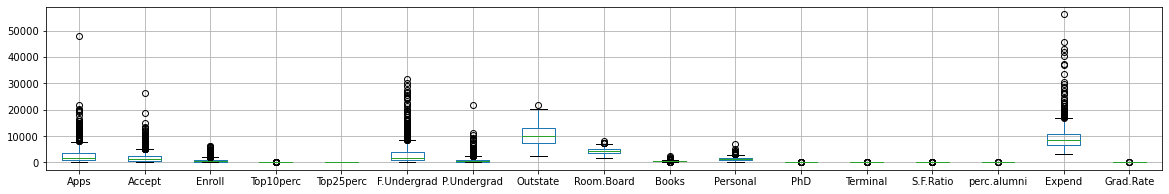

In [29]:
Edu.boxplot(figsize=(20,3))

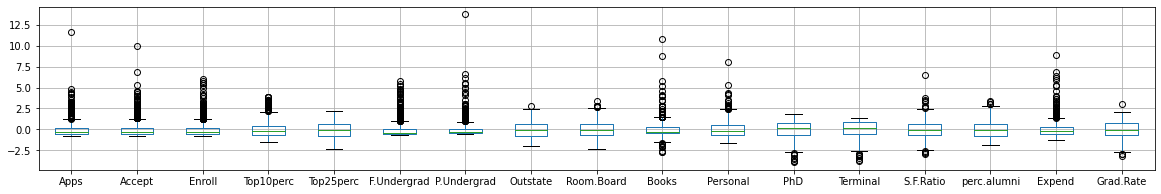

In [30]:
data_new.boxplot(figsize=(20,3))

### Q5. Perform PCA and export the data of the Principal Component scores into a data frame.

In [36]:
# PCA
# Step 1 - Create covariance matrix, already created

In [57]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)

Eigen Vectors 
%s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.93988831e-02 -2.95896092e-02 -8.56967180e-02  4.44638207e-01
   1.11431545e-02]
 [-3.54273947e-01 -8.24118211e-02 -3.50555339e-02  5.15472524e-02
  -3.95434345e-01  5.26927980e-02  1.61332069e-01  1.22678028e-01
 

In [35]:
print('\n Eigen Values \n%s', eig_vals)


 Eigen Values 
%s [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]


In [39]:
## Sorting the Eigen values in descending order
ev = sorted(eig_vals, reverse = True)
print(ev)

[5.450521622150291, 4.483606861940844, 1.1746676129474865, 1.0082057299695018, 0.9342312255505819, 0.8484911715045018, 0.6057878032794006, 0.5878722195930833, 0.530612624700581, 0.4043028977516906, 0.313445879810298, 0.2206109646163887, 0.16779415216580837, 0.14397849747566205, 0.08802463699454277, 0.03672544741045189, 0.023027868633730315]


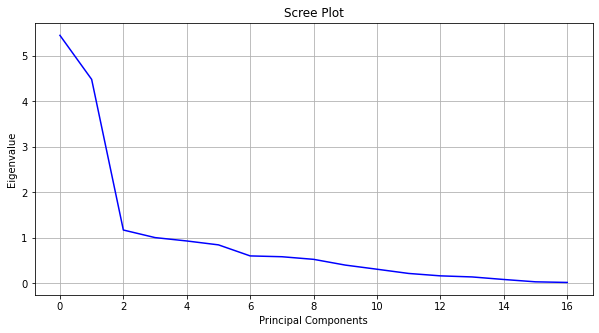

In [41]:
## Creating a Scree Plot
from matplotlib import rcParams
rcParams["figure.figsize"] = 10,5
plt.plot(ev,"b")
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [49]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
principalComponents_df = pca.fit_transform(data_new)

In [50]:
## Creating a DataFrame and Printing it

df_principal_DataFrame = pd.DataFrame(data = principalComponents_df
             , columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7','PC8','PC9'])
print(df_principal_DataFrame)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306  0.638443   
1   -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137  0.236753   
2   -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592 -0.248276   
3    2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508 -1.249356   
4   -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918 -2.159220   
..        ...       ...       ...       ...       ...       ...       ...   
772 -3.328458  1.220255 -0.383388  0.108555  0.776996  0.309429 -0.165021   
773  0.199389 -0.686689  0.051564  0.562269  0.375191  0.373343  0.848453   
774 -0.732561 -0.077235 -0.000406  0.054316 -0.516021  0.468014 -1.317492   
775  7.919327 -2.068329  2.073564  0.852054 -0.947755 -2.069937  0.083328   
776 -0.469508  0.366661 -1.328915 -0.108023 -1.132176  0.839893  1.307313   

          PC8       PC9  
0   -0.879386  0.093084  
1    0.046925  1.113780

In [51]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.32020628 0.26340214 0.06900917 0.05922989 0.05488405 0.04984701
 0.03558871 0.03453621 0.03117234]


In [52]:
## Understanding the cummulative sum of variance explained by n features
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals =3)*100)
print(var)

[32.  58.3 65.2 71.1 76.6 81.6 85.2 88.7 91.8]


In [55]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   
5 -0.016237  0.007535 -0.042558  -0.052693   0.033092    -0.043454   
6 -0.042486 -0.012950 -0.027693  -0.161332  -0.118486    -0.025076   
7 -0.103090 -0.056271  0.058662  -0.122678  -0.102492     0.078890   
8 -0.090227 -0.177865 -0.128561   0.341100   0.403712    -0.059442   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   
5    -0.191199 -0.030000    0.162755  0.641055 -0.331398  0.091256  0.154928   
6     0.061042  0.108529    0.209744 -0.149692  0.633790 -0.001096 -0.028477   
7     0.570784  0.009846   -0.221453  0.213293 -0.232661 -0.077040 -0.012161   
8     0.560673 -0.004573    0.275023 -0.133663 -0.094469 -0.185182 -0.254938   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268  
5   0.487046    -0.047340 -0.298119   0.216163  
6   0.219259     0.243321 -0.226584   0.559944  
7  -0.083605     0.678524 -0.054159  -0.005336  
8   0.274544    -0.255335 -0.049139   0.041904

### Q6. Extract the eigenvalues and eigenvectors.[print both]

In [ ]:
#Refer to Line

### Q7. Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).

In [114]:
data_new.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [117]:
eig_vecs[0]

array([-0.2487656 ,  0.33159823,  0.0630921 , -0.28131053,  0.00574141,
        0.01623744,  0.04248635,  0.1030904 ,  0.09022708, -0.0525098 ,
        0.3589704 , -0.4591395 ,  0.04304621, -0.13340581,  0.0806328 ,
       -0.59583097,  0.02407091])

#### Principal component equation in terms of Eigen Vectors
It would be cross multiplicaiton of variables and eigen vectors of 0 index 

In [122]:
print('The Explicit form of 1st PC with respect to eigen vectors is: ')
for i in range(0,data_new.shape[1]):
    print('{} * {}'.format(np.round(eig_vecs[0][i],2),data_new.columns[i]),end=' + ')

The Explicit form of 1st PC with respect to eigen vectors is: 
-0.25 * Apps + 0.33 * Accept + 0.06 * Enroll + -0.28 * Top10perc + 0.01 * Top25perc + 0.02 * F.Undergrad + 0.04 * P.Undergrad + 0.1 * Outstate + 0.09 * Room.Board + -0.05 * Books + 0.36 * Personal + -0.46 * PhD + 0.04 * Terminal + -0.13 * S.F.Ratio + 0.08 * perc.alumni + -0.6 * Expend + 0.02 * Grad.Rate + 

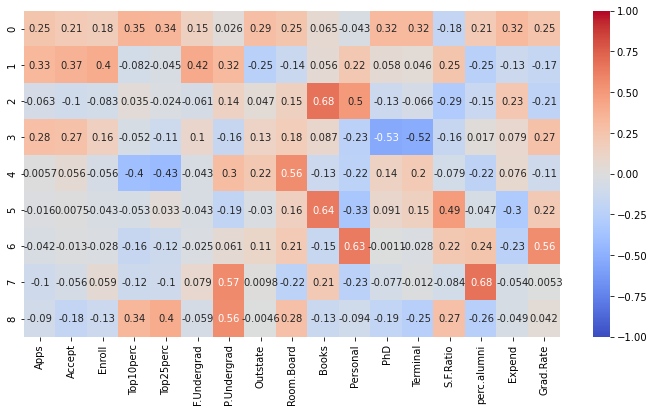

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,annot=True, cmap='coolwarm',vmin=-1,vmax=1);

### Q8. Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [102]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


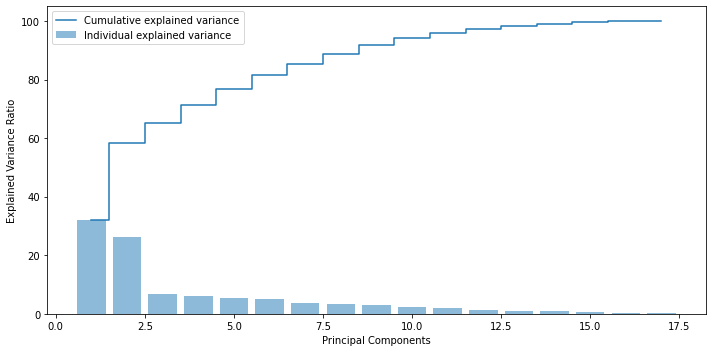

In [60]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

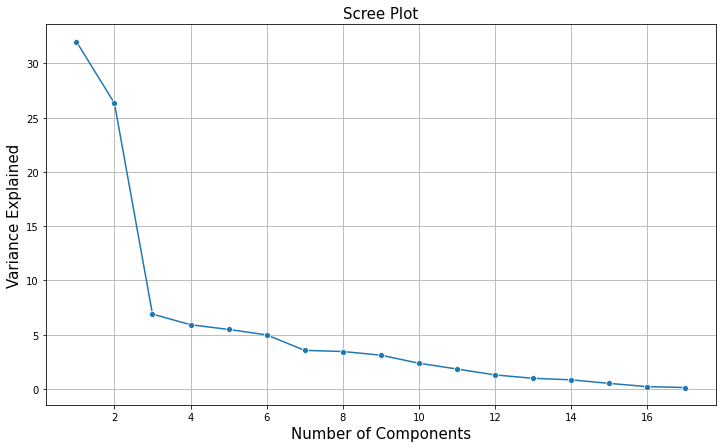

In [108]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

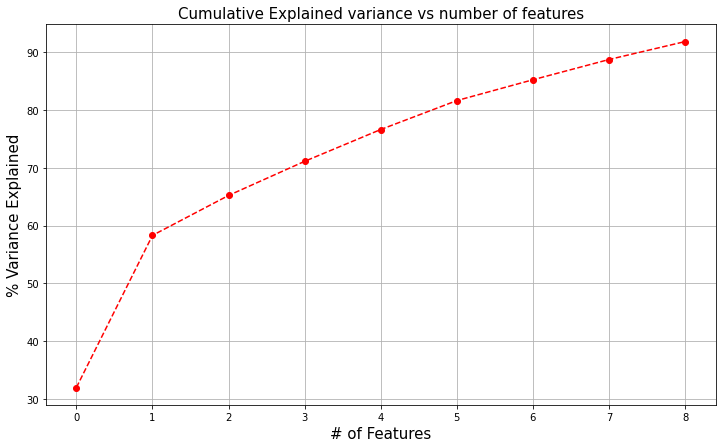

In [59]:
## Plotting the cummumative variance
plt.figure(figsize=(12,7))
plt.plot(var, marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative Explained variance vs number of features',fontsize=15)
plt.grid()
plt.show()

### Q9. Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

Refer to Project Report

### Thank You!!